In [57]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
## get data using pandas

# Adelie penguin data 
adelie = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff"

# Gentoo penguin data 
gentoo = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381"

# Chinstrap penguin data 
chinstrap = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462"

# use pandas to get dataset using the provided URL
adelieCsv = pd.read_csv(adelie)
gentooCsv = pd.read_csv(gentoo)
chinstrapCsv = pd.read_csv(chinstrap)

# merge the 3 datasets in one using the concatenate pandas function
frames = [adelieCsv, gentooCsv, chinstrapCsv]
data = pd.concat(frames)
#shape = data.shape
#print(shape)


In [59]:
data.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Using Culmen Length (mm) and Flipper Length (mm) to predict the specie

In [60]:
# drop unnecesary columns according to the instructions 

#dataframe = data.drop(columns=['studyName', 'Sample Number', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 
# 'Date Egg', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'])

df = data.drop(columns=['studyName', 'Sample Number', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 
                        'Date Egg', 'Culmen Depth (mm)','Body Mass (g)' ,'Sex','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'])

df

,Species,Culmen Length (mm),Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),39.1,181.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,186.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,195.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,193.0
...,...,...,...
63,Chinstrap penguin (Pygoscelis antarctica),55.8,207.0
64,Chinstrap penguin (Pygoscelis antarctica),43.5,202.0
65,Chinstrap penguin (Pygoscelis antarctica),49.6,193.0
66,Chinstrap penguin (Pygoscelis antarctica),50.8,210.0


In [61]:
#check for missing values 
df1 = df[df.isna().any(axis=1)]
df1

,Species,Culmen Length (mm),Flipper Length (mm)
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN
119,Gentoo penguin (Pygoscelis papua),NaN,NaN


In [62]:
#drop useless rows that dosen´t contain any info
df2 = df.drop([3, 119])
df2 = df2.reset_index(drop=True) 
df2

,Species,Culmen Length (mm),Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),39.1,181.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,186.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,195.0
3,Adelie Penguin (Pygoscelis adeliae),36.7,193.0
4,Adelie Penguin (Pygoscelis adeliae),39.3,190.0
...,...,...,...
334,Chinstrap penguin (Pygoscelis antarctica),55.8,207.0
335,Chinstrap penguin (Pygoscelis antarctica),43.5,202.0
336,Chinstrap penguin (Pygoscelis antarctica),49.6,193.0
337,Chinstrap penguin (Pygoscelis antarctica),50.8,210.0


In [63]:
# transform categorical values(text) to numerical values
# 0 = Adelie Penguin (Pygoscelis adeliae)
# 2 = Gentoo penguin (Pygoscelis papua)
# 1 = Chinstrap penguin (Pygoscelis antarctica)
label = preprocessing.LabelEncoder()
specie = label.fit_transform(df2['Species'])
df2['Species'] = label.fit_transform(df2['Species'])


# 0 = Adelie Penguin (Pygoscelis adeliae)
# 2 = Gentoo penguin (Pygoscelis papua)
# 1 = Chinstrap penguin (Pygoscelis antarctica)

In [64]:
#split dataset into varibles , where y is the varible I need to predict
dataset = np.array(df2)

x = dataset[:, 1:3] #x are the Culmen Length (mm) and Flipper Length (mm) columns
y = dataset[:, 0]   #y is the penguin species


In [65]:
#split the dataset in test and train data
test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)

In [66]:
# set neural network with the MLP classifier class 
MLP = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=15000)
MLP.fit(xTrain, yTrain)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=15000)

In [67]:
predict = MLP.predict(xTest)
predict

array([1., 0., 1., 0., 2., 0., 1., 0., 2., 0., 0., 0., 1., 1., 0., 2., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       2., 0., 1., 2., 2., 2., 0., 1., 0., 2., 2., 1., 1., 0., 2., 0., 0.,
       2., 0., 0., 1., 2., 2., 2., 2., 1., 2., 0., 1., 2., 0., 0., 0., 0.])

In [68]:
CM = confusion_matrix(yTest,predict)
print(confusion_matrix(yTest,predict))

[[29  0  2]
 [ 0 16  3]
 [ 6  0 12]]


In [69]:
#Predict 100% of data and comparing with the original dataset
predictSp = MLP.predict(x)
predictY = {'Real Specie': y, 'Predicted Specie': predictSp}
dfpredictY = pd.DataFrame(data=predictY)
dfpredictY

,Real Specie,Predicted Specie
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
334,1.0,1.0
335,1.0,2.0
336,1.0,1.0
337,1.0,1.0


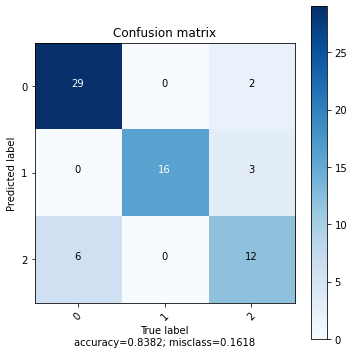

In [70]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#Testing the function

plot_confusion_matrix(values = CM, classes = ['0', '1','2'])

In [72]:
print(accuracy_score(yTest, predict))

0.8382352941176471


Using 2 features to classify the specie will give us around 70-80% accuracy wich is kind of expect given that uor dataset has only 300 examples

In [73]:
# 0 = Adelie Penguin (Pygoscelis adeliae)
# 2 = Gentoo penguin (Pygoscelis papua)
# 1 = Chinstrap penguin (Pygoscelis antarctica)

In [74]:
# example of prediction using the model
predict = MLP.predict([[ 50.1,200.2]])
print(predict)

[1.]


# Just for curiosity I will try running the model but using more features to see if the accuracy increases

In [75]:
data.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [76]:
#'studyName', 'Sample Number', 'Region', 'Island', 'Stage', 'Culmen Depth (mm)','Body Mass (g)' ,'Sex','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
dfeature = data.drop(columns=['Region','Sex','studyName','Sample Number','Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments'])
dfeature2 = dfeature.drop([3, 119])
dfeature2 = dfeature2.reset_index(drop=True) 
dfeature2 = dfeature2.dropna() 
dfeature2

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,8.76651,-25.32426
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,3650.0,8.66496,-25.29805
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,38.9,17.8,181.0,3625.0,9.18718,-25.21799
...,...,...,...,...,...,...,...,...
334,Chinstrap penguin (Pygoscelis antarctica),Dream,55.8,19.8,207.0,4000.0,9.70465,-24.53494
335,Chinstrap penguin (Pygoscelis antarctica),Dream,43.5,18.1,202.0,3400.0,9.37608,-24.40753
336,Chinstrap penguin (Pygoscelis antarctica),Dream,49.6,18.2,193.0,3775.0,9.46180,-24.70615
337,Chinstrap penguin (Pygoscelis antarctica),Dream,50.8,19.0,210.0,4100.0,9.98044,-24.68741


In [77]:
#check for missing values 
dfea1 = dfeature2[dfeature2.isna().any(axis=1)]
dfea1

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)


In [78]:
array = np.array(dfeature2)
#array = dfeature2.values
X = array[:,1:8]
Y = array[:,0]
X

array([['Torgersen', 39.5, 17.4, ..., 3800.0, 8.94956, -24.69454],
       ['Torgersen', 40.3, 18.0, ..., 3250.0, 8.36821, -25.33302],
       ['Torgersen', 36.7, 19.3, ..., 3450.0, 8.76651, -25.32426],
       ...,
       ['Dream', 49.6, 18.2, ..., 3775.0, 9.4618, -24.70615],
       ['Dream', 50.8, 19.0, ..., 4100.0, 9.98044, -24.68741],
       ['Dream', 50.2, 18.7, ..., 3775.0, 9.39305, -24.25255]],
      dtype=object)

In [79]:
# transform categorical values(text) to numerical values
label = preprocessing.LabelEncoder()
specie = label.fit_transform(dfeature2['Species'])
dfeature2['Species'] = label.fit_transform(dfeature2['Species'])
# 0 = Adelie Penguin (Pygoscelis adeliae)
# 2 = Gentoo penguin (Pygoscelis papua)
# 1 = Chinstrap penguin (Pygoscelis antarctica)

Island = label.fit_transform(dfeature2['Island'])
dfeature2['Island'] = label.fit_transform(dfeature2['Island'])
# 2 = Torgersen
# 1 = Dream
# 0 = Biscoe


Island,	Culmen Length (mm)	,Culmen Depth (mm),	Flipper Length (mm)	, Body Mass (g) ,	 Delta 15 N  , 	Delta 13 C 


Apply some feature selection algorithms in order to check which features will give the best prediction

In [80]:
# Recursive Feature Elimination
array = dfeature2.values
X = array[:,1:8]
Y = array[:,0]
# feature extraction
model = LogisticRegression(solver='lbfgs', max_iter=10000)
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\pjher\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 5
Selected Features: [ True  True  True False False  True  True]
Feature Ranking: [1 1 1 2 3 1 1]


In [81]:
# Feature Importance
array = dfeature2.values
X = array[:,1:8]
Y = array[:,0]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.15963002 0.24764806 0.11931737 0.14546619 0.07256045 0.10999224
 0.14538566]


In [82]:
# according to the results of feature selecction algorithms body mass is not a good predictor for the penguin specie 
dfeatureS = dfeature2.drop(columns=['Body Mass (g)'])
dfeatureS

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,39.5,17.4,186.0,8.94956,-24.69454
2,0,2,40.3,18.0,195.0,8.36821,-25.33302
3,0,2,36.7,19.3,193.0,8.76651,-25.32426
4,0,2,39.3,20.6,190.0,8.66496,-25.29805
5,0,2,38.9,17.8,181.0,9.18718,-25.21799
...,...,...,...,...,...,...,...
334,1,1,55.8,19.8,207.0,9.70465,-24.53494
335,1,1,43.5,18.1,202.0,9.37608,-24.40753
336,1,1,49.6,18.2,193.0,9.46180,-24.70615
337,1,1,50.8,19.0,210.0,9.98044,-24.68741


In [83]:
#split data
array1 = dfeatureS.values
X = array1[:,1:7]
Y = array1[:,0]
test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = test_size)

In [84]:
# create neural network
MLP1 = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=17000)
MLP1.fit(xTrain, yTrain)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=17000)

In [85]:
predict = MLP1.predict(xTest)
print(accuracy_score(yTest, predict))
predict

0.9848484848484849


array([2., 0., 2., 0., 0., 0., 2., 2., 1., 1., 1., 1., 0., 2., 0., 0., 2.,
       2., 0., 1., 1., 0., 2., 2., 0., 1., 2., 0., 2., 0., 2., 1., 0., 1.,
       2., 2., 2., 0., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2., 0., 1., 2.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 2., 2., 2.])

In [86]:
CM1 = confusion_matrix(yTest,predict)
print(confusion_matrix(yTest,predict))

[[27  0  0]
 [ 1 14  0]
 [ 0  0 24]]


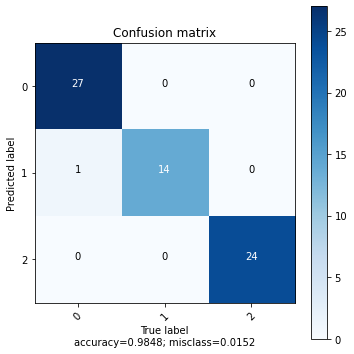

In [87]:
plot_confusion_matrix(values = CM1, classes = ['0', '1','2'])

In [88]:
predict1 = MLP1.predict([[ 2, 39.5, 17.4, 186.0, 8.94956, -24.69454]])
print(predict1)

[0.]


In [90]:
#Predict 100% of data and comparing with the original dataset
predictSp1 = MLP1.predict(X)
predictY1 = {'Real Specie': Y, 'Predicted Specie': predictSp1}
dfpredictY1 = pd.DataFrame(data=predictY1)
dfpredictY1

,Real Specie,Predicted Specie
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
322,1.0,1.0
323,1.0,0.0
324,1.0,1.0
325,1.0,1.0


# 0 = Adelie Penguin (Pygoscelis adeliae)
# 2 = Gentoo penguin (Pygoscelis papua)
# 1 = Chinstrap penguin (Pygoscelis antarctica)

In [94]:
#save results 
dfpredictY1.to_csv ('FeatureSelection_result_dataframe.csv', index = False, header=True)
dfpredictY.to_csv ('result_dataframe.csv', index = False, header=True)

Conclusions: This problem had some challenges which at first I did not know how solve, but using mi hability to learn by myself I was able to overcome the challenges, In this proyect I learnt the importance of selecting the right features for your model, because the first model which only used Bill lenght and Flipper lenght was somewhat accurate(70-80%) but it have some considerable error porcentaje and more diference of precision in between runs.

Because of that I decided to go a step further and try selecting more features using some feature selecction algorithms like Recursive Feature Elimination and Feature Importance to see if the accuracy increased, and at the end the model in which I used more features had a better accuracy(95-98%) and the diference of precision in between runs was considerably LESS that the previous model, and that make conclude that the Bill lenght and Flipper lenght are good predictor but the dataset contained more predictors that are good because they have some statistical significance in the spicie prediction.